In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
df['Sex'] = df['Sex'].replace(('I','M','F'),(0,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 8), (836, 8), (3341,), (836,))

In [28]:
X_tr = X_tr.astype('float32')
# X_tr.info()
y_tr = y_tr.astype('float32')
X_te = X_te.astype('float32')
y_te = y_te.astype('float32')

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## model 1

In [73]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(1))

In [76]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [77]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 267us/sample - loss: 79.7283 - mse: 79.7283 - val_loss: 41.6198 - val_mse: 41.6198
Epoch 2/100
2672/2672 [==============================] - 0s 43us/sample - loss: 20.1482 - mse: 20.1482 - val_loss: 13.5718 - val_mse: 13.5718
Epoch 3/100
2672/2672 [==============================] - 0s 49us/sample - loss: 11.4089 - mse: 11.4089 - val_loss: 9.1048 - val_mse: 9.1048
Epoch 4/100
2672/2672 [==============================] - 0s 46us/sample - loss: 9.0776 - mse: 9.0776 - val_loss: 7.4555 - val_mse: 7.4555
Epoch 5/100
2672/2672 [==============================] - 0s 62us/sample - loss: 7.9879 - mse: 7.9879 - val_loss: 6.5812 - val_mse: 6.5812
Epoch 6/100
2672/2672 [==============================] - 0s 47us/sample - loss: 7.2759 - mse: 7.2759 - val_loss: 6.1130 - val_mse: 6.1130
Epoch 7/100
2672/2672 [==============================] - 0s 41us/sample - loss: 6.8143 - mse: 6.8143 - val_loss: 5

2672/2672 [==============================] - 0s 43us/sample - loss: 4.5216 - mse: 4.5216 - val_loss: 4.3259 - val_mse: 4.3259
Epoch 60/100
2672/2672 [==============================] - 0s 39us/sample - loss: 4.5063 - mse: 4.5063 - val_loss: 4.2526 - val_mse: 4.2526
Epoch 61/100
2672/2672 [==============================] - 0s 42us/sample - loss: 4.5100 - mse: 4.5100 - val_loss: 4.2479 - val_mse: 4.2479
Epoch 62/100
2672/2672 [==============================] - 0s 51us/sample - loss: 4.4585 - mse: 4.4585 - val_loss: 4.2842 - val_mse: 4.2842
Epoch 63/100
2672/2672 [==============================] - 0s 47us/sample - loss: 4.5947 - mse: 4.5947 - val_loss: 4.6605 - val_mse: 4.6605
Epoch 64/100
2672/2672 [==============================] - 0s 42us/sample - loss: 4.6130 - mse: 4.6130 - val_loss: 4.2202 - val_mse: 4.2202
Epoch 65/100
2672/2672 [==============================] - 0s 45us/sample - loss: 4.4731 - mse: 4.4731 - val_loss: 4.2517 - val_mse: 4.2517
Epoch 66/100
2672/2672 [================

In [78]:
y_pred = model.predict(X_te)

In [79]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [80]:
score

[4.671496309161757, 4.6714964]

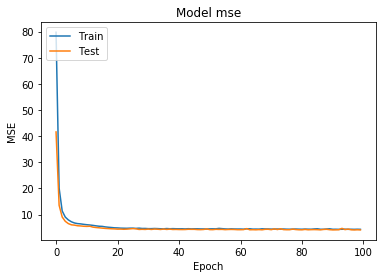

In [81]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 2

In [82]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Flatten())
model.add(Dense(1))

In [83]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [84]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 248us/sample - loss: 91.9383 - mse: 91.9383 - val_loss: 58.6622 - val_mse: 58.6622
Epoch 2/100
2672/2672 [==============================] - 0s 48us/sample - loss: 29.3412 - mse: 29.3412 - val_loss: 13.4319 - val_mse: 13.4319
Epoch 3/100
2672/2672 [==============================] - 0s 39us/sample - loss: 11.8317 - mse: 11.8317 - val_loss: 9.3785 - val_mse: 9.3785
Epoch 4/100
2672/2672 [==============================] - 0s 46us/sample - loss: 8.9401 - mse: 8.9401 - val_loss: 7.1965 - val_mse: 7.1965
Epoch 5/100
2672/2672 [==============================] - 0s 36us/sample - loss: 7.7218 - mse: 7.7218 - val_loss: 6.3351 - val_mse: 6.3351
Epoch 6/100
2672/2672 [==============================] - 0s 41us/sample - loss: 6.9780 - mse: 6.9780 - val_loss: 5.9475 - val_mse: 5.9475
Epoch 7/100
2672/2672 [==============================] - 0s 45us/sample - loss: 6.5784 - mse: 6.5784 - val_loss: 5

2672/2672 [==============================] - 0s 44us/sample - loss: 4.5540 - mse: 4.5540 - val_loss: 4.2836 - val_mse: 4.2836
Epoch 60/100
2672/2672 [==============================] - 0s 29us/sample - loss: 4.5292 - mse: 4.5292 - val_loss: 4.2625 - val_mse: 4.2625
Epoch 61/100
2672/2672 [==============================] - 0s 32us/sample - loss: 4.5090 - mse: 4.5090 - val_loss: 4.3121 - val_mse: 4.3121
Epoch 62/100
2672/2672 [==============================] - 0s 36us/sample - loss: 4.5067 - mse: 4.5067 - val_loss: 4.3347 - val_mse: 4.3347
Epoch 63/100
2672/2672 [==============================] - 0s 31us/sample - loss: 4.5411 - mse: 4.5411 - val_loss: 4.2801 - val_mse: 4.2801
Epoch 64/100
2672/2672 [==============================] - 0s 29us/sample - loss: 4.4907 - mse: 4.4907 - val_loss: 4.3700 - val_mse: 4.3700
Epoch 65/100
2672/2672 [==============================] - 0s 26us/sample - loss: 4.4878 - mse: 4.4878 - val_loss: 4.4477 - val_mse: 4.4477
Epoch 66/100
2672/2672 [================

In [85]:
y_pred = model.predict(X_te)

In [86]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [87]:
score

[4.757182445252341, 4.757182]

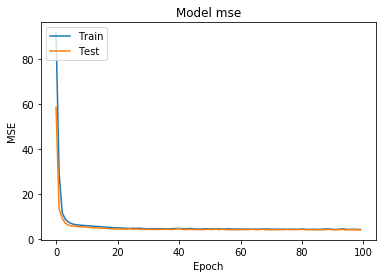

In [88]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 3

In [89]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(1))

In [90]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [91]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 315us/sample - loss: 30.7252 - mse: 30.7252 - val_loss: 7.0266 - val_mse: 7.0266
Epoch 2/100
2672/2672 [==============================] - 0s 42us/sample - loss: 12.2341 - mse: 12.2341 - val_loss: 8.3313 - val_mse: 8.3313
Epoch 3/100
2672/2672 [==============================] - 0s 48us/sample - loss: 10.3394 - mse: 10.3394 - val_loss: 6.2316 - val_mse: 6.2316
Epoch 4/100
2672/2672 [==============================] - 0s 43us/sample - loss: 7.7205 - mse: 7.7205 - val_loss: 6.0068 - val_mse: 6.0068
Epoch 5/100
2672/2672 [==============================] - 0s 38us/sample - loss: 8.2209 - mse: 8.2209 - val_loss: 8.3187 - val_mse: 8.3187
Epoch 6/100
2672/2672 [==============================] - 0s 32us/sample - loss: 7.8461 - mse: 7.8461 - val_loss: 7.1159 - val_mse: 7.1159
Epoch 7/100
2672/2672 [==============================] - 0s 45us/sample - loss: 7.8307 - mse: 7.8307 - val_loss: 6.449

2672/2672 [==============================] - 0s 89us/sample - loss: 4.9578 - mse: 4.9578 - val_loss: 4.4995 - val_mse: 4.4995
Epoch 60/100
2672/2672 [==============================] - 0s 61us/sample - loss: 5.3263 - mse: 5.3263 - val_loss: 5.4475 - val_mse: 5.4475
Epoch 61/100
2672/2672 [==============================] - 0s 51us/sample - loss: 5.3892 - mse: 5.3892 - val_loss: 4.6600 - val_mse: 4.6600
Epoch 62/100
2672/2672 [==============================] - 0s 99us/sample - loss: 5.3347 - mse: 5.3347 - val_loss: 6.1078 - val_mse: 6.1078
Epoch 63/100
2672/2672 [==============================] - 0s 50us/sample - loss: 5.0974 - mse: 5.0974 - val_loss: 4.3709 - val_mse: 4.3709
Epoch 64/100
2672/2672 [==============================] - 0s 64us/sample - loss: 5.0287 - mse: 5.0287 - val_loss: 4.8177 - val_mse: 4.8177
Epoch 65/100
2672/2672 [==============================] - 0s 60us/sample - loss: 5.0632 - mse: 5.0632 - val_loss: 4.9331 - val_mse: 4.9331
Epoch 66/100
2672/2672 [================

In [92]:
y_pred = model.predict(X_te)

In [93]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [94]:
score

[5.438513148914684, 5.4385133]

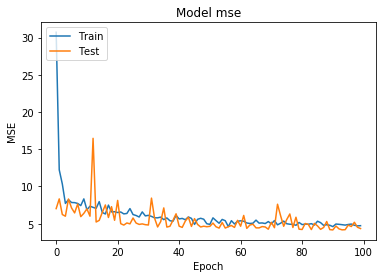

In [95]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 4

In [96]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Flatten())
model.add(Dense(1))

In [97]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [98]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_data=[X_te,y_te])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 214us/sample - loss: 92.1827 - mse: 92.1827 - val_loss: 59.3181 - val_mse: 59.3181
Epoch 2/100
3341/3341 [==============================] - 0s 43us/sample - loss: 24.2449 - mse: 24.2449 - val_loss: 12.3173 - val_mse: 12.3173
Epoch 3/100
3341/3341 [==============================] - 0s 39us/sample - loss: 9.9382 - mse: 9.9382 - val_loss: 8.6419 - val_mse: 8.6419
Epoch 4/100
3341/3341 [==============================] - 0s 32us/sample - loss: 7.5826 - mse: 7.5826 - val_loss: 7.6277 - val_mse: 7.6277
Epoch 5/100
3341/3341 [==============================] - 0s 35us/sample - loss: 7.0969 - mse: 7.0969 - val_loss: 7.3989 - val_mse: 7.3989
Epoch 6/100
3341/3341 [==============================] - 0s 38us/sample - loss: 6.7052 - mse: 6.7052 - val_loss: 7.3579 - val_mse: 7.3579
Epoch 7/100
3341/3341 [==============================] - 0s 37us/sample - loss: 6.5716 - mse: 6.5716 - val_loss: 7.0

3341/3341 [==============================] - 0s 43us/sample - loss: 4.3839 - mse: 4.3839 - val_loss: 4.9144 - val_mse: 4.9144
Epoch 60/100
3341/3341 [==============================] - 0s 42us/sample - loss: 4.3624 - mse: 4.3624 - val_loss: 5.0754 - val_mse: 5.0754
Epoch 61/100
3341/3341 [==============================] - 0s 40us/sample - loss: 4.3696 - mse: 4.3696 - val_loss: 4.8770 - val_mse: 4.8770
Epoch 62/100
3341/3341 [==============================] - 0s 32us/sample - loss: 4.3194 - mse: 4.3194 - val_loss: 4.6770 - val_mse: 4.6770
Epoch 63/100
3341/3341 [==============================] - 0s 47us/sample - loss: 4.3898 - mse: 4.3898 - val_loss: 4.8350 - val_mse: 4.8350
Epoch 64/100
3341/3341 [==============================] - 0s 46us/sample - loss: 4.3621 - mse: 4.3621 - val_loss: 4.8008 - val_mse: 4.8008
Epoch 65/100
3341/3341 [==============================] - 0s 44us/sample - loss: 4.3015 - mse: 4.3015 - val_loss: 4.6271 - val_mse: 4.6271
Epoch 66/100
3341/3341 [================

In [99]:
y_pred = model.predict(X_te)

In [100]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [101]:
score

[4.609015083769291, 4.609015]

0.5892749939251459


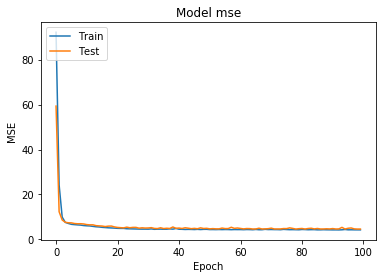

In [105]:
from sklearn.metrics import r2_score

print(r2_score(y_te, y_pred))

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

9.0 [9.409758]
10.0 [8.841999]
7.0 [7.8093567]
9.0 [10.607117]
11.0 [11.458971]
8.0 [7.73471]
5.0 [5.7719226]
9.0 [10.564738]
11.0 [10.768655]
8.0 [10.303115]
6.0 [6.5505548]
8.0 [7.7413597]
8.0 [9.45724]
11.0 [10.80453]
10.0 [12.036177]
6.0 [6.726576]
9.0 [10.783953]
7.0 [6.351643]
9.0 [9.437919]
9.0 [9.086469]
11.0 [8.309867]
9.0 [9.202671]
8.0 [11.781668]
13.0 [10.729113]
19.0 [16.827276]
11.0 [10.369151]
8.0 [8.643634]
5.0 [6.0334544]
9.0 [10.362533]
11.0 [10.178726]
27.0 [18.624062]
11.0 [10.187915]
8.0 [8.775603]
11.0 [10.475301]
16.0 [10.49398]
9.0 [7.65221]
7.0 [8.515247]
7.0 [8.796864]
10.0 [10.622074]
4.0 [5.3332276]
13.0 [11.170262]
19.0 [14.840932]
9.0 [9.792569]
7.0 [9.82436]
12.0 [11.465246]
9.0 [10.01639]
12.0 [10.460644]
11.0 [12.668633]
8.0 [7.6779265]
9.0 [9.922382]
12.0 [12.022324]
8.0 [9.097309]
3.0 [4.7039194]
11.0 [11.164678]
6.0 [6.113048]
15.0 [12.39939]
10.0 [12.518998]
7.0 [7.8753214]
10.0 [13.187642]
6.0 [6.086589]
6.0 [5.9127145]
3.0 [5.8525524]
7.0 [8.03345

8.0 [11.317333]
8.0 [7.7244034]
15.0 [14.249909]
6.0 [5.5031133]
11.0 [10.582019]
10.0 [10.67517]
9.0 [10.418196]
20.0 [14.598401]
9.0 [13.924545]
5.0 [6.621157]
7.0 [6.74673]
10.0 [11.448894]
12.0 [13.042681]
11.0 [11.443322]
9.0 [9.1599455]
11.0 [10.56188]
7.0 [7.261523]
4.0 [5.7778153]
20.0 [13.958468]
6.0 [7.053329]
11.0 [9.346367]
9.0 [10.377514]
6.0 [7.4061675]
10.0 [9.254631]
12.0 [11.8843355]
14.0 [13.747204]
8.0 [12.198777]
9.0 [9.29308]
12.0 [9.9182625]
9.0 [9.627236]
7.0 [7.861067]
7.0 [7.734261]
8.0 [6.853372]
11.0 [8.820792]
10.0 [10.089285]
8.0 [9.291061]
13.0 [12.005213]
15.0 [12.423789]
10.0 [8.561822]
10.0 [9.406423]
11.0 [9.224586]
18.0 [13.565256]
5.0 [5.5200367]
10.0 [7.8562956]
9.0 [8.4673815]
11.0 [9.686272]
12.0 [10.674299]
6.0 [6.118857]
16.0 [9.345346]
8.0 [7.240473]
12.0 [11.747162]
8.0 [7.951748]
6.0 [6.708191]
12.0 [11.484956]
4.0 [4.3423758]
14.0 [11.785815]
7.0 [5.5855436]
15.0 [13.699624]
10.0 [9.952053]
8.0 [9.876391]
6.0 [6.9003363]
15.0 [15.048654]
8.0